# Data visualisation and exploration

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import warnings

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tqdm import tqdm, tqdm_pandas

2022-03-02 10:41:28.829356: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-02 10:41:28.829390: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [87]:
CREMA = '/home/geowilso/code/geowilso/speech-emotion-recognition/raw_data/wav_files'
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav']


In [59]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    
    if part[2] == 'SAD':
        emotion.append('sad')
    elif part[2] == 'ANG':
        emotion.append('angry')
    elif part[2] == 'DIS':
        emotion.append('disgust')
    elif part[2] == 'FEA':
        emotion.append('fear')
    elif part[2] == 'HAP':
        emotion.append('happy')
    elif part[2] == 'NEU':
        emotion.append('neutral')
    else:
        emotion.append('unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['emotion'])
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(gender, columns = ['gender'])],axis=1)
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)

In [60]:
def combo(df):
    return f'{df[1]}_{df[0]}'

def sad(x):
    return 1 if x.lower() == 'sad' else 0

def angry(x):
    return 1 if x.lower() == 'angry' else 0

def disgust(x):
    return 1 if x.lower() == 'disgust' else 0

def fear(x):
    return 1 if x.lower() == 'fear' else 0

def happy(x):
    return 1 if x.lower() == 'happy' else 0

def neutral(x):
    return 1 if x.lower() == 'neutral' else 0

def pos_or_neg(x):
    if x == 'happy':
        return 'positive'
    elif x == 'neutral':
        return x
    else:
        return 'negative'

In [61]:
CREMA_df['gender_emotion'] = CREMA_df.apply(combo,axis=1)
CREMA_df['sad'] = CREMA_df['emotion'].apply(sad)
CREMA_df['angry'] = CREMA_df['emotion'].apply(angry)
CREMA_df['disgust'] = CREMA_df['emotion'].apply(disgust)
CREMA_df['fear'] = CREMA_df['emotion'].apply(fear)
CREMA_df['happy'] = CREMA_df['emotion'].apply(happy)
CREMA_df['neutral'] = CREMA_df['emotion'].apply(neutral)
CREMA_df['pos_or_neg'] = CREMA_df['emotion'].apply(pos_or_neg)

In [62]:
CREMA_df

,emotion,gender,path,gender_emotion,sad,angry,disgust,fear,happy,neutral,pos_or_neg
0,angry,male,../raw_data/wav_files/1001_DFA_ANG_XX.wav,male_angry,0,1,0,0,0,0,negative
1,disgust,male,../raw_data/wav_files/1001_DFA_DIS_XX.wav,male_disgust,0,0,1,0,0,0,negative
2,fear,male,../raw_data/wav_files/1001_DFA_FEA_XX.wav,male_fear,0,0,0,1,0,0,negative
3,happy,male,../raw_data/wav_files/1001_DFA_HAP_XX.wav,male_happy,0,0,0,0,1,0,positive
4,neutral,male,../raw_data/wav_files/1001_DFA_NEU_XX.wav,male_neutral,0,0,0,0,0,1,neutral
...,...,...,...,...,...,...,...,...,...,...,...
7437,disgust,female,../raw_data/wav_files/1091_WSI_DIS_XX.wav,female_disgust,0,0,1,0,0,0,negative
7438,fear,female,../raw_data/wav_files/1091_WSI_FEA_XX.wav,female_fear,0,0,0,1,0,0,negative
7439,happy,female,../raw_data/wav_files/1091_WSI_HAP_XX.wav,female_happy,0,0,0,0,1,0,positive
7440,neutral,female,../raw_data/wav_files/1091_WSI_NEU_XX.wav,female_neutral,0,0,0,0,0,1,neutral


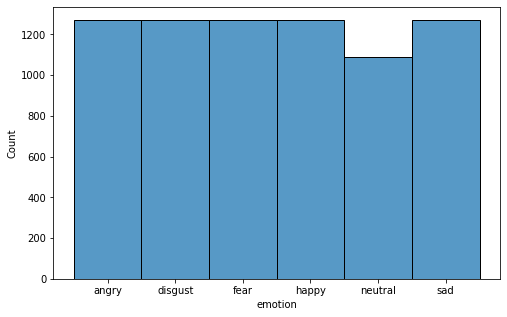

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(CREMA_df.emotion);

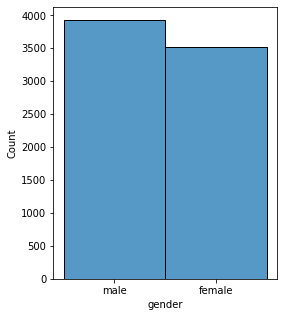

In [8]:
plt.figure(figsize=(4,5))
sns.histplot(CREMA_df.gender);

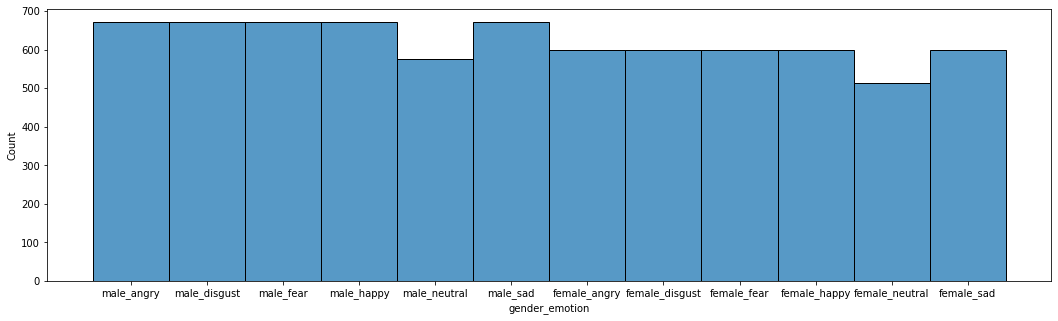

In [9]:
plt.figure(figsize=(18,5))
sns.histplot(CREMA_df.gender_emotion);

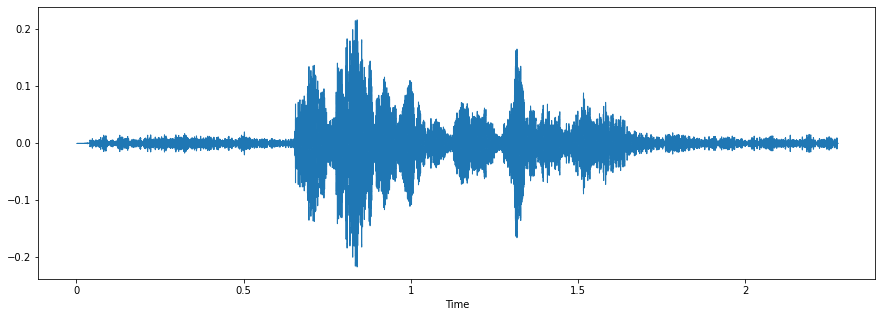

In [10]:
# use the well known Librosa library for this task 
fname = CREMA + '1029_IWW_HAP_XX.wav'  
data, sampling_rate = librosa.load(
    fname,
    sr=44100,
    mono=True,
    offset=0.0,
    duration=None,
    res_type='kaiser_best')

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio 
Audio(fname)

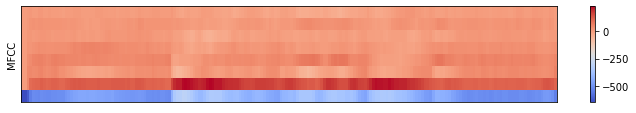

In [11]:
SAMPLE_RATE = 44100  
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
mfcc = librosa.feature.mfcc(y=y,
                            sr=SAMPLE_RATE,
                            S=None,
                            n_mfcc=8,
                            dct_type=2,
                            norm='ortho',
                            lifter=0,)

mfcc.shape
plt.figure(figsize=(12, 6))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar();

In [12]:
mfcc.shape

(8, 197)

/tmp/ipykernel_15209/3395031543.py:2: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3086575e-04
 -8.0877842e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y,


(20, 197)


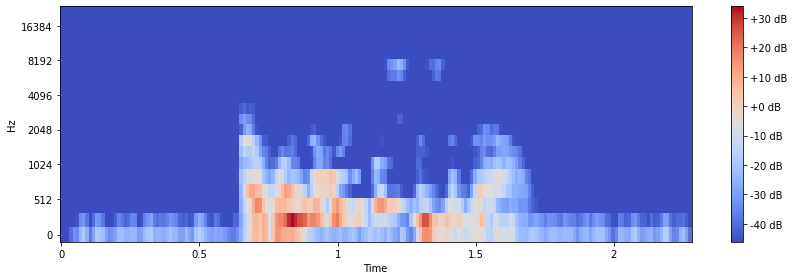

In [85]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) # Chop audio at 5 secs... 
melspec = librosa.feature.melspectrogram(y,
                                         sr=sr,
                                         n_mels=20,
                                         n_fft=2048,
                                         hop_length=512,
                                         win_length=None,
                                         window='hann',
                                         center=True,
                                         pad_mode='constant',
                                         power=2.0)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.amplitude_to_db(melspec)
print(log_S.shape)
# Display the log mel spectrogram
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout();

In [14]:
log_S.shape

(64, 197)

In [15]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5) 
y_harmonic, y_percussive = librosa.effects.hpss(y)
Audio(y_harmonic, rate=sr)

In [16]:
Audio(y_percussive, rate=sr)

/tmp/ipykernel_15209/848197121.py:2: FutureWarning: Pass y=[ 2.2653786e-10 -1.6704486e-10 -4.7815757e-10 ... -3.9538811e-04
 -3.4034817e-04 -2.8997392e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=128)
/tmp/ipykernel_15209/848197121.py:6: FutureWarning: Pass y=[-2.2653816e-10  1.6706120e-10  4.7817572e-10 ...  2.6452215e-04
  2.5947011e-04  2.8997372e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y_percussive, sr=sr, n_mels=128)


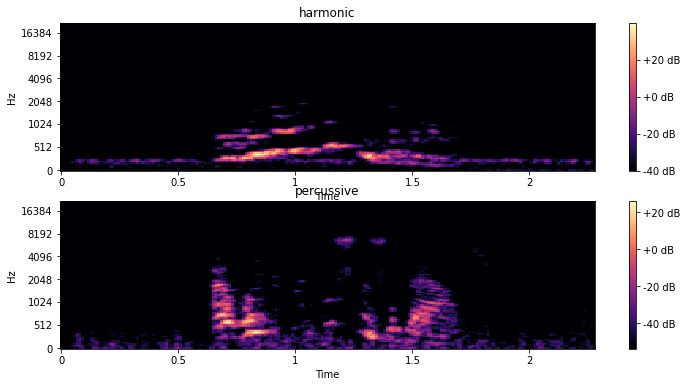

In [17]:
# harmonic 
melspec = librosa.feature.melspectrogram(y_harmonic, sr=sr, n_mels=128)
log_h = librosa.amplitude_to_db(melspec)

# percussive
melspec = librosa.feature.melspectrogram(y_percussive, sr=sr, n_mels=128)
log_p = librosa.amplitude_to_db(melspec)

# Display the log mel spectrogram of both harmonic and percussive
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
librosa.display.specshow(log_h, sr=sr, x_axis='time', y_axis='mel')
plt.title('harmonic')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_p, sr=sr, x_axis='time', y_axis='mel')
plt.title('percussive')
plt.colorbar(format='%+02.0f dB')

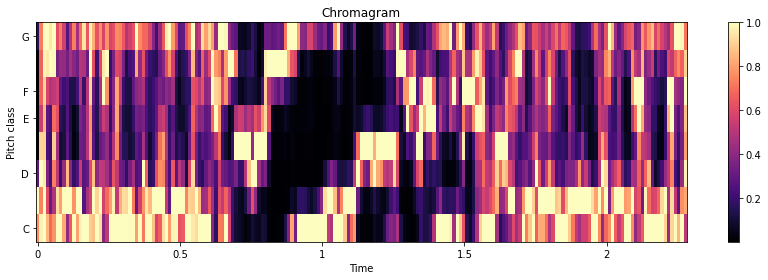

In [18]:
y, sr = librosa.load(fname, sr=SAMPLE_RATE, duration = 5)
C = librosa.feature.chroma_stft(y=y,
                                sr=sr,
                                S=None,
                                n_fft=2048,
                                hop_length=512,
                                win_length=None,
                                window='hann',
                                center=True,
                                pad_mode='constant',
                                tuning=None,
                                n_chroma=8)

# Make a new figure
plt.figure(figsize=(12,4))
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma')
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()

In [19]:
C.shape

(8, 197)

/home/geowilso/.pyenv/versions/3.8.12/envs/speech-emotion-recognition/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=785
  return f(*args, **kwargs)


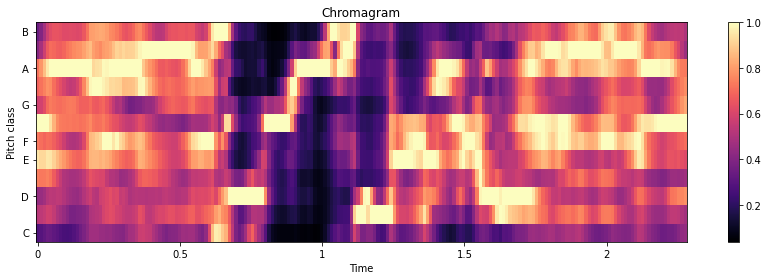

In [20]:
C = librosa.feature.chroma_cqt(y=y,
                           sr=sr,
                           C=None,
                           hop_length=512,
                           fmin=None,
                           threshold=0.0,
                           tuning=None,
                           n_chroma=12,
                           n_octaves=7,
                           window=None,
                           bins_per_octave=36,
                           cqt_mode='full')
# Make a new figure
plt.figure(figsize=(12,4))
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma')
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()

In [21]:
C.shape

(12, 197)

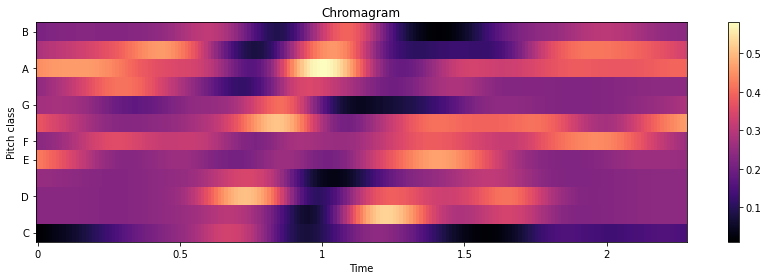

In [22]:
C = librosa.feature.chroma_cens(y=y,
                               sr=sr,
                                C=None,
                                hop_length=512,
                                fmin=None,
                                tuning=None,
                                n_chroma=12,
                                n_octaves=7,
                                bins_per_octave=36,
                                cqt_mode='full',
                                window=None,
                                norm=2,
                                win_len_smooth=41,
                                smoothing_window='hann')

# Make a new figure
plt.figure(figsize=(12,4))
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma')
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()

In [23]:
C.shape

(12, 197)

In [24]:
p0 = librosa.feature.poly_features(y=y,
                                     sr=sr,
                                     S=None,
                                     n_fft=2048,
                                     hop_length=512,
                                     win_length=None,
                                     window='hann',
                                     center=True,
                                     pad_mode='constant',
                                     order=0,
                                     freq=None)
p1 = librosa.feature.poly_features(y=y,
                                     sr=sr,
                                     S=None,
                                     n_fft=2048,
                                     hop_length=512,
                                     win_length=None,
                                     window='hann',
                                     center=True,
                                     pad_mode='constant',
                                     order=1,
                                     freq=None)
p2 = librosa.feature.poly_features(y=y,
                                     sr=sr,
                                     S=None,
                                     n_fft=2048,
                                     hop_length=512,
                                     win_length=None,
                                     window='hann',
                                     center=True,
                                     pad_mode='constant',
                                     order=2,
                                     freq=None)
p0.shape

(1, 197)

In [25]:
p2.shape

(3, 197)

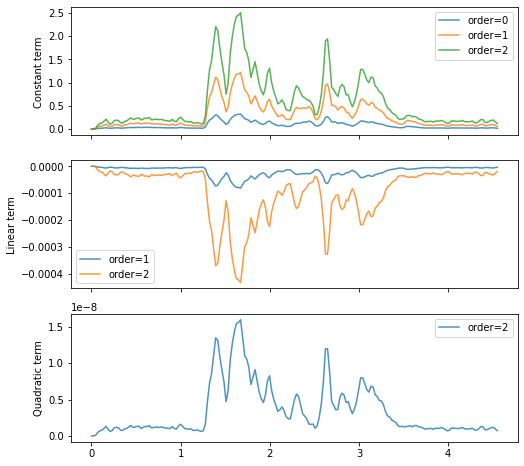

In [26]:
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(8, 8))
times = librosa.times_like(p0)
ax[0].plot(times, p0[0], label='order=0', alpha=0.8)
ax[0].plot(times, p1[1], label='order=1', alpha=0.8)
ax[0].plot(times, p2[2], label='order=2', alpha=0.8)
ax[0].legend()
ax[0].label_outer()
ax[0].set(ylabel='Constant term ')
ax[1].plot(times, p1[0], label='order=1', alpha=0.8)
ax[1].plot(times, p2[1], label='order=2', alpha=0.8)
ax[1].set(ylabel='Linear term')
ax[1].label_outer()
ax[1].legend()
ax[2].plot(times, p2[0], label='order=2', alpha=0.8)
ax[2].set(ylabel='Quadratic term')
ax[2].legend()

# Padding All Clips

In [69]:
CREMA_df.to_csv('targets.csv')
targets = pd.read_csv('targets.csv')
group = targets.groupby('gender_emotion')
sample = group.head(150)
sample

,Unnamed: 0,emotion,gender,path,gender_emotion,sad,angry,disgust,fear,happy,neutral,pos_or_neg
0,0,angry,male,../raw_data/wav_files/1001_DFA_ANG_XX.wav,male_angry,0,1,0,0,0,0,negative
1,1,disgust,male,../raw_data/wav_files/1001_DFA_DIS_XX.wav,male_disgust,0,0,1,0,0,0,negative
2,2,fear,male,../raw_data/wav_files/1001_DFA_FEA_XX.wav,male_fear,0,0,0,1,0,0,negative
3,3,happy,male,../raw_data/wav_files/1001_DFA_HAP_XX.wav,male_happy,0,0,0,0,1,0,positive
4,4,neutral,male,../raw_data/wav_files/1001_DFA_NEU_XX.wav,male_neutral,0,0,0,0,0,1,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
2467,2467,neutral,male,../raw_data/wav_files/1031_IOM_NEU_XX.wav,male_neutral,0,0,0,0,0,1,neutral
2473,2473,neutral,male,../raw_data/wav_files/1031_ITH_NEU_XX.wav,male_neutral,0,0,0,0,0,1,neutral
2479,2479,neutral,male,../raw_data/wav_files/1031_ITS_NEU_XX.wav,male_neutral,0,0,0,0,0,1,neutral
2485,2485,neutral,male,../raw_data/wav_files/1031_IWL_NEU_XX.wav,male_neutral,0,0,0,0,0,1,neutral


win_length // 2 + 1

length = []

for path in sample['path'][:100]:
    wav = librosa.load(path, sr=SAMPLE_RATE, offset=0.3, duration = 3.7)
    mfcc = librosa.feature.mfcc(y=wav[0],sr=sr,n_mfcc=10)
    length.append(mfcc.shape[1])

max(length)

In [28]:
def cut_or_pad(array, n):
    if array.shape[1] < n:
        return pad_sequences(array,n,padding='post',value=-1000.)
    elif array.shape[1] > n:
        return array[:,:n]
    else:
        return array

In [29]:
features = []
sr=44100
n = 270
for path in tqdm(sample['path']):
    wav = librosa.load(path, sr=sr, offset=0.3, duration = 4.2)
    
    mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
    mfcc = cut_or_pad(mfcc,n)
    
    poly = librosa.feature.poly_features(y=wav[0],sr=sr,order=4)
    poly = cut_or_pad(poly,n)
    
    chroma = librosa.feature.chroma_stft(y=y,sr=sr,n_chroma=10)
    chroma = cut_or_pad(chroma,n)

    melspec = librosa.feature.melspectrogram(y,sr=sr,n_mels=20)
    melspec = cut_or_pad(melspec,n)
    log_S = librosa.amplitude_to_db(melspec)

    zcr = librosa.feature.zero_crossing_rate(y=wav[0])
    zcr = cut_or_pad(zcr,n)
    
    rms = librosa.feature.rms(y=wav[0])
    rms = cut_or_pad(rms,n)
    
#     f_tempo = librosa.feature.fourier_tempogram(y=wav[0], sr=sr, win_length=18)
#     f_tempo = cut_or_pad(f_tempo,n)
    
#     tempo = librosa.feature.tempogram(y=wav[0], sr=SAMPLE_RATE, win_length=10)
#     tempo = cut_or_pad(tempo,n)
    
    
#     spectral_centroid = librosa.feature.spectral_centroid(y=wav[0],sr=sr)
#     spectral_centroid = cut_or_pad(spectral_centroid,n)
    
#     spectral_bandwidth = librosa.feature.spectral_bandwidth(y=wav[0],sr=sr)
#     spectral_bandwidth = cut_or_pad(spectral_bandwidth,n)
    
#     spectral_contrast = librosa.feature.spectral_contrast(y=wav[0],sr=sr)
#     spectral_contrast = cut_or_pad(spectral_contrast,n)
    
#     spectral_flatness = librosa.feature.spectral_flatness(y=wav[0])
#     spectral_flatness = cut_or_pad(spectral_flatness,n)
    
#     spectral_rolloff = librosa.feature.spectral_rolloff(y=wav[0])
#     spectral_rolloff = cut_or_pad(spectral_rolloff,n)
    
#     tonnetz = librosa.feature.tonnetz(y=wav[0],sr=sr)
#     tonnetz = cut_or_pad(tonnetz,n)
    
#     chroma_cqt = librosa.feature.chroma_cqt(y=wav[0],sr=sr,n_chroma=10,bins_per_octave=30)
#     chroma_cqt = cut_or_pad(chroma_cqt,n)
    
#     chroma_cens = librosa.feature.chroma_cens(y=wav[0],sr=sr,n_chroma=10,bins_per_octave=30)
#     chroma_cens = cut_or_pad(chroma_cens,n)
    
    
    #combine
    array = np.vstack((mfcc,
                       poly,
                       chroma,
                       log_S,
                       zcr,
                       rms,
#                        f_tempo,
#                        tempo,
#                        spectral_centroid,
#                        spectral_bandwidth,
#                        spectral_contrast ,
#                        spectral_flatness ,
#                        spectral_rolloff  ,
#                        tonnetz           ,
#                        chroma_cqt        ,
#                        chroma_cens,
                      ))
    
    array = array.T

    
    #mfcc = np.concatenate((mfcc,poly),axis=0,dtype=None)
    features.append(array)
    
X_pad = pad_sequences(features, dtype='float32', padding='post', value=-1000.)
X_pad.shape

  0%|                                                                                          | 0/1800 [00:00<?, ?it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[6.8410282e-04 7.8342145e-04 7.3706545e-04 ... 9.9765680e-07 3.1930197e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
/tmp/ipykernel_15209/3288804814.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.3086575e-04
 -8.0877842e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(y,sr=sr,n_mels=20)
  0%|                                                                                  | 1/1800 [00:00<05:37,  5.33it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 8.3516091e-03  9.6511990e-03  9.4666239e-03 ...  6.4893459e-07
 -2.2089328

  1%|▊                                                                                | 19/1800 [00:03<05:27,  5.44it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 3.0820724e-03  3.5759874e-03  3.5613745e-03 ... -2.9809482e-06
 -2.3183886e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  1%|▉                                                                                | 20/1800 [00:04<05:38,  5.25it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00240587 0.00277476 0.00278992 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  1%|▉                                                                                | 21/1800 [00:04<05:33,  5.34it/s]/tmp/ipykernel_15209/3288804814.py:7: F

  2%|█▊                                                                               | 39/1800 [00:08<06:37,  4.43it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-1.2773339e-03 -1.3693747e-03 -1.3935370e-03 ... -5.6605835e-08
  1.3802916e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  2%|█▊                                                                               | 40/1800 [00:08<06:49,  4.30it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00854268 -0.01011854 -0.00992972 ...  0.00023626  0.00015272
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  2%|█▊                                                                               | 41/1800 [00:08<06:49,  4.29it/s]/tmp/ipykernel_15209/3288804814.

  3%|██▋                                                                              | 59/1800 [00:12<06:22,  4.55it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[8.0893440e-03 9.1317352e-03 8.6665154e-03 ... 2.9341913e-05 2.2261349e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  3%|██▋                                                                              | 60/1800 [00:12<06:29,  4.47it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 4.9713376e-04  5.6332583e-04  5.7637633e-04 ... -5.6797089e-05
 -4.6628153e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  3%|██▋                                                                              | 61/1800 [00:12<06:51,  4.22it/s]/tmp/ipykernel_15209

  5%|████▎                                                                            | 97/1800 [00:21<06:02,  4.70it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00519217 -0.00593023 -0.00567386 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  5%|████▍                                                                            | 98/1800 [00:21<05:57,  4.77it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-4.3659443e-03 -5.2503860e-03 -5.3963684e-03 ...  1.1603877e-08
  1.1054924e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  6%|████▍                                                                            | 99/1800 [00:21<06:07,  4.63it/s]/tmp/ipykernel_15209/3288804814.py:7: Fu

  6%|█████▏                                                                          | 117/1800 [00:25<06:30,  4.31it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00208853 0.00261006 0.00270777 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  7%|█████▏                                                                          | 118/1800 [00:26<06:25,  4.37it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00484919 0.00573946 0.00590674 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  7%|█████▎                                                                          | 119/1800 [00:26<06:15,  4.48it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 3.

  9%|██████▉                                                                         | 156/1800 [00:35<05:46,  4.74it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00121818 0.00158092 0.00168553 ... 0.00076661 0.00050516 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  9%|██████▉                                                                         | 157/1800 [00:35<05:46,  4.74it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-1.3481994e-02 -1.5590837e-02 -1.5123977e-02 ... -4.2307595e-11
 -3.2685014e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
  9%|███████                                                                         | 158/1800 [00:35<05:50,  4.68it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 11%|████████▋                                                                       | 195/1800 [00:44<06:52,  3.89it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-7.8721074e-03 -8.8430913e-03 -8.2684448e-03 ...  5.0962285e-08
  4.2960114e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 11%|████████▋                                                                       | 196/1800 [00:44<07:32,  3.55it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-2.2115826e-03 -2.3016552e-03 -1.9703144e-03 ... -3.0948049e-05
 -2.0010821e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 11%|████████▊                                                                       | 197/1800 [00:44<07:21,  3.63it/s]/tmp/ipykernel

 13%|██████████▍                                                                     | 234/1800 [00:54<06:53,  3.79it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.0019598  0.00182859 0.00142539 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 13%|██████████▍                                                                     | 235/1800 [00:54<06:57,  3.75it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[4.4057490e-03 4.9414737e-03 4.5313626e-03 ... 1.3611320e-04 7.8757701e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 13%|██████████▍                                                                     | 236/1800 [00:55<07:20,  3.55it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureW

 14%|███████████▎                                                                    | 254/1800 [00:59<06:50,  3.76it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.0014727  0.00185943 0.00191411 ... 0.0013265  0.00092899 0.00045919] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 14%|███████████▎                                                                    | 255/1800 [01:00<07:19,  3.51it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-7.590276e-03 -9.011839e-03 -9.085069e-03 ... -9.688856e-07 -5.612904e-07
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 14%|███████████▍                                                                    | 256/1800 [01:00<08:06,  3.17it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureW

 15%|████████████▏                                                                   | 274/1800 [01:04<05:33,  4.57it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-6.3663865e-03 -7.3449812e-03 -7.2608758e-03 ... -9.4957722e-05
 -9.4598581e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 15%|████████████▏                                                                   | 275/1800 [01:05<05:48,  4.37it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-2.0815206e-03 -2.3210912e-03 -2.1359627e-03 ... -2.5703028e-07
 -2.2150948e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 15%|████████████▎                                                                   | 276/1800 [01:05<06:01,  4.21it/s]/tmp/ipykernel

 16%|█████████████                                                                   | 294/1800 [01:09<05:39,  4.43it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 4.1457107e-03  4.5623081e-03  4.3337909e-03 ... -2.0975671e-07
  2.4390451e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 16%|█████████████                                                                   | 295/1800 [01:09<05:52,  4.27it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[4.0508757e-04 8.4105314e-04 9.5526816e-04 ... 2.1418025e-06 8.6410719e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 16%|█████████████▏                                                                  | 296/1800 [01:10<06:09,  4.07it/s]/tmp/ipykernel_15209

 17%|█████████████▉                                                                  | 314/1800 [01:14<06:01,  4.11it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00598416 0.00656697 0.00602339 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 18%|██████████████                                                                  | 315/1800 [01:15<05:53,  4.20it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-1.5856011e-02 -1.5033940e-02 -6.2954230e-03 ...  2.4825995e-08
  3.5780317e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 18%|██████████████                                                                  | 316/1800 [01:15<05:36,  4.41it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 20%|███████████████▋                                                                | 353/1800 [01:23<05:48,  4.16it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-7.3939818e-03 -8.6910781e-03 -8.6368052e-03 ...  2.5510235e-05
  1.5978401e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 20%|███████████████▋                                                                | 354/1800 [01:23<05:37,  4.28it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00667262 0.00773547 0.00766943 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 20%|███████████████▊                                                                | 355/1800 [01:24<05:36,  4.30it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 21%|████████████████▌                                                               | 373/1800 [01:28<05:49,  4.08it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00099464 0.00141949 0.00170941 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 21%|████████████████▌                                                               | 374/1800 [01:28<05:44,  4.14it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 1.6210205e-03  2.1598793e-03  2.3488654e-03 ... -1.5822765e-05
  6.1401479e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 21%|████████████████▋                                                               | 375/1800 [01:28<05:43,  4.14it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 22%|█████████████████▍                                                              | 393/1800 [01:33<05:43,  4.10it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00443983 -0.00514514 -0.00503647 ... -0.00021696 -0.0001197
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 22%|█████████████████▌                                                              | 394/1800 [01:33<05:23,  4.35it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-1.5594306e-03 -2.2611355e-03 -2.8858944e-03 ...  3.4291037e-09
  8.9129765e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 22%|█████████████████▌                                                              | 395/1800 [01:33<05:45,  4.07it/s]/tmp/ipykernel_15209/3288804814.p

 23%|██████████████████▎                                                             | 413/1800 [01:38<05:13,  4.42it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-1.17847519e-02 -1.34596983e-02 -1.30097885e-02 ... -3.91151934e-06
 -2.43205559e-05  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 23%|██████████████████▍                                                             | 414/1800 [01:38<05:28,  4.22it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-6.7968434e-04 -3.1627872e-04  1.2706945e-04 ...  6.9166561e-10
  4.5295767e-10  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 23%|██████████████████▍                                                             | 415/1800 [01:38<05:27,  4.22it/s]/tmp/ipy

 25%|████████████████████                                                            | 451/1800 [01:46<05:04,  4.43it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00570377 -0.00639113 -0.00602159 ... -0.00028001 -0.00018867
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 25%|████████████████████                                                            | 452/1800 [01:46<04:58,  4.52it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00729641 -0.00836514 -0.00815465 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 25%|████████████████████▏                                                           | 453/1800 [01:47<04:57,  4.53it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass 

 26%|████████████████████▉                                                           | 471/1800 [01:51<05:45,  3.85it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00831064 0.00921834 0.00876637 ... 0.000329   0.00021609 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 26%|████████████████████▉                                                           | 472/1800 [01:51<05:35,  3.96it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-9.4738026e-04 -1.6238191e-03 -2.2327043e-03 ...  7.4725154e-05
  1.1113736e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 26%|█████████████████████                                                           | 473/1800 [01:52<05:38,  3.92it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 27%|█████████████████████▊                                                          | 492/1800 [01:56<05:07,  4.25it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-3.9768526e-03 -5.1402892e-03 -5.5476255e-03 ... -1.3179307e-04
 -8.4794563e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 27%|█████████████████████▉                                                          | 493/1800 [01:56<05:16,  4.13it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[1.3544999e-02 1.5549960e-02 1.5065611e-02 ... 2.5912876e-05 1.2302682e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 27%|█████████████████████▉                                                          | 494/1800 [01:57<05:09,  4.22it/s]/tmp/ipykernel_15209

 28%|██████████████████████▊                                                         | 512/1800 [02:00<04:14,  5.06it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00208528 0.00225115 0.00213962 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 28%|██████████████████████▊                                                         | 513/1800 [02:00<04:23,  4.89it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00895204 0.01011535 0.009696   ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 29%|██████████████████████▊                                                         | 514/1800 [02:01<04:37,  4.63it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[7.2

 31%|████████████████████████▍                                                       | 551/1800 [02:10<05:14,  3.97it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00282415 -0.00349459 -0.00364607 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 31%|████████████████████████▌                                                       | 552/1800 [02:11<05:18,  3.91it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-1.6788770e-04 -4.7418126e-04 -8.5029402e-04 ...  3.4035556e-06
 -1.5582863e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 31%|████████████████████████▌                                                       | 553/1800 [02:11<05:16,  3.94it/s]/tmp/ipykernel_15209/3288804814.py:7: Fu

 32%|█████████████████████████▍                                                      | 571/1800 [02:15<04:52,  4.20it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00245504 -0.00310545 -0.00354599 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 32%|█████████████████████████▍                                                      | 572/1800 [02:16<05:08,  3.98it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-1.4241420e-03 -1.3557655e-03 -9.4115263e-04 ... -1.1967600e-07
 -4.3288702e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 32%|█████████████████████████▍                                                      | 573/1800 [02:16<05:09,  3.96it/s]/tmp/ipykernel_15209/3288804814.py:7: Fu

 33%|██████████████████████████▎                                                     | 591/1800 [02:20<04:20,  4.64it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 1.5525591e-02  1.2804506e-02  5.6399656e-03 ... -8.7724111e-05
 -5.3250598e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 33%|██████████████████████████▎                                                     | 592/1800 [02:20<04:05,  4.92it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00270108 0.00238182 0.00149187 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 33%|██████████████████████████▎                                                     | 593/1800 [02:20<04:22,  4.60it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 34%|███████████████████████████▏                                                    | 611/1800 [02:25<04:49,  4.10it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 1.9544070e-03  1.7059622e-03  9.6075051e-04 ... -1.1435772e-04
 -8.8483714e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 34%|███████████████████████████▏                                                    | 612/1800 [02:25<04:45,  4.16it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 8.576617e-04  9.841657e-04  8.866693e-04 ... -9.103334e-05 -7.497656e-05
  0.000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 34%|███████████████████████████▏                                                    | 613/1800 [02:25<04:46,  4.14it/s]/tmp/ipykernel_15209

 35%|████████████████████████████                                                    | 631/1800 [02:30<04:58,  3.91it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 4.7895410e-03  5.6206803e-03  5.5439379e-03 ... -3.8307835e-06
 -6.4319152e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 35%|████████████████████████████                                                    | 632/1800 [02:30<04:58,  3.92it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-3.3778949e-03 -3.7712948e-03 -3.4921451e-03 ...  1.2975578e-05
 -1.4956873e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 35%|████████████████████████████▏                                                   | 633/1800 [02:30<05:23,  3.60it/s]/tmp/ipykernel

 37%|█████████████████████████████▊                                                  | 670/1800 [02:40<04:17,  4.40it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.0020981  -0.00260284 -0.0028196  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 37%|█████████████████████████████▊                                                  | 671/1800 [02:40<04:09,  4.53it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.0047062  0.00529421 0.00518708 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 37%|█████████████████████████████▊                                                  | 672/1800 [02:40<04:10,  4.51it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00

 38%|██████████████████████████████▋                                                 | 690/1800 [02:44<04:43,  3.92it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-8.4174434e-03 -9.8892218e-03 -9.9414792e-03 ...  4.0327621e-09
 -3.1763827e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 38%|██████████████████████████████▋                                                 | 691/1800 [02:44<04:43,  3.91it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-4.9942415e-03 -5.6590936e-03 -5.5295648e-03 ... -6.5141592e-07
 -7.3790454e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 38%|██████████████████████████████▊                                                 | 692/1800 [02:45<04:30,  4.09it/s]/tmp/ipykernel

 39%|███████████████████████████████▌                                                | 710/1800 [02:49<04:22,  4.15it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 9.2997076e-03  1.0936650e-02  1.0819303e-02 ... -8.4738851e-08
 -4.2684103e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 40%|███████████████████████████████▌                                                | 711/1800 [02:50<04:10,  4.35it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-2.0249118e-03 -1.7706847e-03 -1.0652371e-03 ...  3.3387727e-07
 -4.5391778e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 40%|███████████████████████████████▋                                                | 712/1800 [02:50<04:06,  4.41it/s]/tmp/ipykernel

 41%|████████████████████████████████▍                                               | 730/1800 [02:54<03:35,  4.95it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 7.0251971e-03  7.5221485e-03  6.9181323e-03 ... -8.6375403e-05
 -5.4720942e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 41%|████████████████████████████████▍                                               | 731/1800 [02:54<03:43,  4.78it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-5.6087732e-04 -7.2117569e-04 -6.5961847e-04 ...  3.1366744e-05
  1.9168554e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 41%|████████████████████████████████▌                                               | 732/1800 [02:54<03:40,  4.84it/s]/tmp/ipykernel

 42%|█████████████████████████████████▎                                              | 750/1800 [02:58<03:46,  4.63it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00274366 -0.00312021 -0.00292966 ...  0.0001638   0.00010345
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 42%|█████████████████████████████████▍                                              | 751/1800 [02:58<03:34,  4.88it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00112932 -0.00180947 -0.00221791 ... -0.00025469 -0.00016577
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 42%|█████████████████████████████████▍                                              | 752/1800 [02:58<03:39,  4.77it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarnin

 43%|██████████████████████████████████▏                                             | 770/1800 [03:03<04:49,  3.55it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 4.6677585e-03  5.3704339e-03  5.2284934e-03 ... -2.0144237e-08
 -4.5129696e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 43%|██████████████████████████████████▎                                             | 771/1800 [03:03<04:53,  3.51it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00041205 -0.00051001 -0.00045566 ...  0.00015236  0.00011733
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 43%|██████████████████████████████████▎                                             | 772/1800 [03:03<04:36,  3.72it/s]/tmp/ipykernel_15209/3288804814.

 44%|███████████████████████████████████                                             | 790/1800 [03:08<04:48,  3.51it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00181541 -0.00223071 -0.00254157 ...  0.00017713  0.00012163
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 44%|███████████████████████████████████▏                                            | 791/1800 [03:08<04:43,  3.56it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00126348 -0.00134455 -0.00123045 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 44%|███████████████████████████████████▏                                            | 792/1800 [03:09<04:33,  3.68it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass 

 45%|████████████████████████████████████                                            | 810/1800 [03:13<03:38,  4.53it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[2.6045069e-03 2.7051307e-03 2.0317968e-03 ... 7.1747876e-05 4.6504771e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 45%|████████████████████████████████████                                            | 811/1800 [03:13<03:31,  4.67it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00888671 0.00990683 0.0093575  ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 45%|████████████████████████████████████                                            | 812/1800 [03:13<03:38,  4.52it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureW

 46%|████████████████████████████████████▉                                           | 830/1800 [03:17<03:40,  4.39it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-6.7044684e-04 -4.1246775e-04 -2.2791806e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 46%|████████████████████████████████████▉                                           | 831/1800 [03:18<04:06,  3.94it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-3.3846211e-03 -4.1030371e-03 -4.2006918e-03 ... -2.8721584e-05
 -2.3324625e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 46%|████████████████████████████████████▉                                           | 832/1800 [03:18<04:04,  3.96it/s]/tmp/ipykernel

 47%|█████████████████████████████████████▊                                          | 850/1800 [03:22<03:21,  4.72it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[1.6134711e-03 1.8957523e-03 1.8516670e-03 ... 1.5780136e-04 8.4713480e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 47%|█████████████████████████████████████▊                                          | 851/1800 [03:22<03:26,  4.60it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-6.5007298e-03 -7.4552107e-03 -7.1042194e-03 ... -3.0445608e-07
 -8.6926164e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 47%|█████████████████████████████████████▊                                          | 852/1800 [03:22<03:23,  4.66it/s]/tmp/ipykernel_15209

 48%|██████████████████████████████████████▋                                         | 870/1800 [03:26<03:31,  4.40it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 2.6741209e-03  3.5151946e-03  3.8426125e-03 ... -6.5700692e-06
  7.9961756e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 48%|██████████████████████████████████████▋                                         | 871/1800 [03:27<03:27,  4.49it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00535185 -0.00568078 -0.00501443 ...  0.0002821   0.00017206
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 48%|██████████████████████████████████████▊                                         | 872/1800 [03:27<03:33,  4.34it/s]/tmp/ipykernel_15209/3288804814.

 49%|███████████████████████████████████████▌                                        | 890/1800 [03:31<03:19,  4.57it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-4.0445924e-03 -2.0584355e-03  1.6401443e-03 ...  2.1358115e-12
 -6.3371015e-13  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 50%|███████████████████████████████████████▌                                        | 891/1800 [03:31<03:16,  4.63it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 1.0596971e-02  1.1526444e-02  1.0648170e-02 ...  2.6898936e-11
 -4.5164490e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 50%|███████████████████████████████████████▋                                        | 892/1800 [03:31<03:08,  4.81it/s]/tmp/ipykernel

 51%|████████████████████████████████████████▍                                       | 910/1800 [03:35<03:08,  4.71it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00157506 0.00187468 0.00200954 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 51%|████████████████████████████████████████▍                                       | 911/1800 [03:36<03:11,  4.63it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 5.0034586e-02  5.7411723e-02  5.5658132e-02 ... -5.6175221e-12
  2.1530102e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 51%|████████████████████████████████████████▌                                       | 912/1800 [03:36<03:04,  4.80it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 52%|█████████████████████████████████████████▎                                      | 930/1800 [03:40<03:06,  4.65it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[4.4307141e-03 4.9982495e-03 4.7418396e-03 ... 6.5306958e-05 4.1639887e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 52%|█████████████████████████████████████████▍                                      | 931/1800 [03:40<03:10,  4.56it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00326139 -0.00366921 -0.00363539 ... -0.00017692 -0.00011682
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 52%|█████████████████████████████████████████▍                                      | 932/1800 [03:40<03:04,  4.69it/s]/tmp/ipykernel_15209/3288804814.py:7: 

 54%|███████████████████████████████████████████                                     | 969/1800 [03:48<03:38,  3.80it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-3.8147913e-04 -8.0503098e-04 -1.0732091e-03 ... -2.6430471e-05
 -1.7845947e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 54%|███████████████████████████████████████████                                     | 970/1800 [03:49<03:30,  3.94it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-2.2251187e-03 -2.6540854e-03 -2.7944378e-03 ...  1.2178858e-04
  7.4769574e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 54%|███████████████████████████████████████████▏                                    | 971/1800 [03:49<03:27,  4.00it/s]/tmp/ipykernel

 56%|████████████████████████████████████████████▏                                  | 1008/1800 [03:56<02:45,  4.78it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 9.1153327e-03  1.2616478e-02  1.4868623e-02 ... -9.0708018e-05
 -5.4893477e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 56%|████████████████████████████████████████████▎                                  | 1009/1800 [03:57<02:44,  4.82it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-3.2719877e-02 -3.8439330e-02 -3.8822211e-02 ... -4.2716230e-12
  1.2674203e-12  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 56%|████████████████████████████████████████████▎                                  | 1010/1800 [03:57<02:42,  4.88it/s]/tmp/ipykernel

 58%|█████████████████████████████████████████████▉                                 | 1046/1800 [04:05<02:44,  4.58it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-5.3679565e-04 -7.7116569e-03 -1.1492918e-02 ... -3.5109751e-06
  1.1967205e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 58%|█████████████████████████████████████████████▉                                 | 1047/1800 [04:05<02:47,  4.50it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 2.6834128e-02  3.0594179e-02  2.9528253e-02 ... -5.4487077e-06
  7.8287258e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 58%|█████████████████████████████████████████████▉                                 | 1048/1800 [04:05<02:57,  4.24it/s]/tmp/ipykernel

 60%|███████████████████████████████████████████████▌                               | 1085/1800 [04:13<02:41,  4.44it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-1.1647770e-02 -1.2877903e-02 -1.1995006e-02 ... -2.1123478e-07
 -4.4688807e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 60%|███████████████████████████████████████████████▋                               | 1086/1800 [04:13<02:38,  4.51it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-2.7494840e-03 -3.0745105e-03 -2.9804718e-03 ...  1.6113506e-07
  6.4580675e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 60%|███████████████████████████████████████████████▋                               | 1087/1800 [04:14<02:49,  4.20it/s]/tmp/ipykernel

 61%|████████████████████████████████████████████████▍                              | 1105/1800 [04:18<02:36,  4.44it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-7.1492516e-03 -8.3091063e-03 -8.3221905e-03 ...  1.9245585e-06
 -2.9428704e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 61%|████████████████████████████████████████████████▌                              | 1106/1800 [04:18<02:42,  4.26it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00507515 -0.00569018 -0.00524245 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 62%|████████████████████████████████████████████████▌                              | 1107/1800 [04:19<02:35,  4.46it/s]/tmp/ipykernel_15209/3288804814.py:7: Fu

 62%|█████████████████████████████████████████████████▍                             | 1125/1800 [04:23<02:39,  4.23it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00043856 0.00085271 0.00114386 ... 0.00050216 0.00028589 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 63%|█████████████████████████████████████████████████▍                             | 1126/1800 [04:23<02:35,  4.33it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-5.3246995e-03 -5.7352646e-03 -5.0488934e-03 ... -5.1989675e-05
 -3.8497732e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 63%|█████████████████████████████████████████████████▍                             | 1127/1800 [04:23<02:31,  4.44it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 64%|██████████████████████████████████████████████████▎                            | 1145/1800 [04:27<02:14,  4.85it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-6.8098959e-04 -7.8874070e-04 -8.5044204e-04 ... -1.2860789e-06
  2.2891479e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 64%|██████████████████████████████████████████████████▎                            | 1146/1800 [04:27<02:14,  4.88it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 5.6066741e-03  6.1784619e-03  5.8023962e-03 ... -1.1585689e-04
 -7.8645928e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 64%|██████████████████████████████████████████████████▎                            | 1147/1800 [04:27<02:31,  4.30it/s]/tmp/ipykernel

 66%|███████████████████████████████████████████████████▉                           | 1184/1800 [04:36<02:11,  4.67it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00599463 -0.0070453  -0.00714799 ...  0.00022539  0.00015499
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 66%|████████████████████████████████████████████████████                           | 1185/1800 [04:36<02:09,  4.74it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-6.7816203e-04 -6.5865339e-04 -4.7063944e-04 ...  1.8186232e-06
 -1.7073129e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 66%|████████████████████████████████████████████████████                           | 1186/1800 [04:36<02:08,  4.79it/s]/tmp/ipykernel_15209/3288804814.

 68%|█████████████████████████████████████████████████████▋                         | 1222/1800 [04:44<01:55,  5.00it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[2.2813829e-03 2.7733890e-03 2.8111434e-03 ... 4.9563007e-09 2.0985192e-08
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 68%|█████████████████████████████████████████████████████▋                         | 1223/1800 [04:44<01:55,  5.00it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[3.5308583e-03 4.1055311e-03 4.0065646e-03 ... 2.4331033e-05 1.4389514e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 68%|█████████████████████████████████████████████████████▋                         | 1224/1800 [04:44<01:57,  4.91it/s]/tmp/ipykernel_15209/32888

 70%|███████████████████████████████████████████████████████▎                       | 1261/1800 [04:52<02:17,  3.93it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00266705 -0.00315044 -0.00324527 ...  0.00019682  0.00011062
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 70%|███████████████████████████████████████████████████████▍                       | 1262/1800 [04:52<02:09,  4.15it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.01128339 -0.01265295 -0.01180184 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 70%|███████████████████████████████████████████████████████▍                       | 1263/1800 [04:53<02:14,  3.98it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass 

 71%|████████████████████████████████████████████████████████▏                      | 1281/1800 [04:57<02:27,  3.53it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-5.7201867e-04 -9.5683610e-04 -1.1389392e-03 ...  6.0368438e-05
  1.5940048e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 71%|████████████████████████████████████████████████████████▎                      | 1282/1800 [04:58<02:18,  3.73it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 0.00122571  0.00097498  0.00049055 ... -0.00022675 -0.00014591
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 71%|████████████████████████████████████████████████████████▎                      | 1283/1800 [04:58<02:29,  3.46it/s]/tmp/ipykernel_15209/3288804814.

 73%|█████████████████████████████████████████████████████████▉                     | 1320/1800 [05:06<02:12,  3.63it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 9.9659218e-03  1.0898601e-02  9.9939117e-03 ... -1.1806843e-04
 -9.5353549e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 73%|█████████████████████████████████████████████████████████▉                     | 1321/1800 [05:06<02:09,  3.71it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 4.5225574e-03  5.5545145e-03  5.9284773e-03 ... -6.2238818e-05
 -1.0711193e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 73%|██████████████████████████████████████████████████████████                     | 1322/1800 [05:07<02:14,  3.56it/s]/tmp/ipykernel

 76%|███████████████████████████████████████████████████████████▋                   | 1360/1800 [05:15<01:43,  4.26it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-7.8395633e-03 -1.4487018e-02 -2.1536583e-02 ... -2.6958021e-05
  2.3858132e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 76%|███████████████████████████████████████████████████████████▋                   | 1361/1800 [05:15<01:43,  4.25it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-5.4267249e-03 -5.2569741e-03 -3.7942817e-03 ...  2.5773950e-08
  3.6447343e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 76%|███████████████████████████████████████████████████████████▊                   | 1362/1800 [05:15<01:41,  4.31it/s]/tmp/ipykernel

 77%|████████████████████████████████████████████████████████████▌                  | 1380/1800 [05:19<01:20,  5.24it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-4.3538705e-04 -1.4260136e-04  5.0207472e-04 ... -4.5385651e-09
 -1.6325145e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 77%|████████████████████████████████████████████████████████████▌                  | 1381/1800 [05:19<01:18,  5.31it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-4.0324996e-03 -4.4179466e-03 -4.0215678e-03 ... -1.5034458e-06
  1.6953609e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 77%|████████████████████████████████████████████████████████████▋                  | 1382/1800 [05:19<01:18,  5.35it/s]/tmp/ipykernel

 78%|█████████████████████████████████████████████████████████████▍                 | 1400/1800 [05:23<01:18,  5.07it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00095411 0.00099952 0.00102437 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 78%|█████████████████████████████████████████████████████████████▍                 | 1401/1800 [05:23<01:28,  4.49it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00202421 -0.00235536 -0.00229897 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 78%|█████████████████████████████████████████████████████████████▌                 | 1402/1800 [05:24<01:35,  4.16it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[4.57

 79%|██████████████████████████████████████████████████████████████▎                | 1420/1800 [05:27<01:13,  5.18it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[4.4402620e-03 5.0819274e-03 5.0562387e-03 ... 2.1802739e-06 4.6028736e-06
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 79%|██████████████████████████████████████████████████████████████▎                | 1421/1800 [05:27<01:13,  5.14it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-8.6555874e-04 -4.8640228e-04  1.3935834e-05 ...  8.2618826e-08
 -9.5441033e-09  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 79%|██████████████████████████████████████████████████████████████▍                | 1422/1800 [05:28<01:14,  5.08it/s]/tmp/ipykernel_15209

 81%|████████████████████████████████████████████████████████████████               | 1459/1800 [05:35<01:05,  5.21it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-2.3350604e-03 -2.4174456e-03 -2.1051092e-03 ...  4.4707308e-06
 -5.3267973e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 81%|████████████████████████████████████████████████████████████████               | 1460/1800 [05:36<01:05,  5.16it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00499797 0.00516904 0.0045565  ... 0.00033063 0.0002014  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 81%|████████████████████████████████████████████████████████████████               | 1461/1800 [05:36<01:05,  5.19it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 82%|████████████████████████████████████████████████████████████████▉              | 1479/1800 [05:39<01:05,  4.92it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.02636535 -0.0311354  -0.03148374 ...  0.00039499  0.00026843
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 82%|████████████████████████████████████████████████████████████████▉              | 1480/1800 [05:39<01:02,  5.16it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 0.00926446  0.009906    0.00890113 ... -0.00051722 -0.00031649
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 82%|████████████████████████████████████████████████████████████████▉              | 1481/1800 [05:40<01:01,  5.19it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarnin

 83%|█████████████████████████████████████████████████████████████████▊             | 1499/1800 [05:43<00:59,  5.06it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[8.2013831e-02 9.7892322e-02 1.0029280e-01 ... 8.1495358e-07 5.9791836e-07
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 83%|█████████████████████████████████████████████████████████████████▊             | 1500/1800 [05:43<00:57,  5.19it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 3.8417692e-03  4.6173511e-03  4.7392589e-03 ... -1.5463688e-07
  1.6701992e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 83%|█████████████████████████████████████████████████████████████████▉             | 1501/1800 [05:44<00:58,  5.11it/s]/tmp/ipykernel_15209

 84%|██████████████████████████████████████████████████████████████████▋            | 1519/1800 [05:48<01:00,  4.66it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[6.4385859e-03 6.3269180e-03 4.5403554e-03 ... 8.1487764e-05 1.1796882e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 84%|██████████████████████████████████████████████████████████████████▋            | 1520/1800 [05:48<00:57,  4.91it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00055629 -0.00096732 -0.00134466 ... -0.00023112 -0.00014703
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 84%|██████████████████████████████████████████████████████████████████▊            | 1521/1800 [05:48<00:55,  5.01it/s]/tmp/ipykernel_15209/3288804814.py:7: 

 86%|███████████████████████████████████████████████████████████████████▌           | 1539/1800 [05:52<00:56,  4.60it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 1.5038125e-02  1.6912146e-02  1.6439987e-02 ... -7.7457736e-07
  9.3181256e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 86%|███████████████████████████████████████████████████████████████████▌           | 1540/1800 [05:52<00:54,  4.80it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 7.9797776e-03  7.7749426e-03  4.2039962e-03 ... -1.1422753e-06
  9.6517363e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 86%|███████████████████████████████████████████████████████████████████▋           | 1541/1800 [05:52<00:52,  4.90it/s]/tmp/ipykernel

 88%|█████████████████████████████████████████████████████████████████████▎         | 1578/1800 [06:00<00:45,  4.89it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-3.3164022e-03 -3.7297213e-03 -3.6723216e-03 ... -6.7926812e-06
  4.9166380e-07  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 88%|█████████████████████████████████████████████████████████████████████▎         | 1579/1800 [06:00<00:47,  4.65it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00729582 0.00648203 0.00354396 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 88%|█████████████████████████████████████████████████████████████████████▎         | 1580/1800 [06:00<00:46,  4.72it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 89%|██████████████████████████████████████████████████████████████████████▏        | 1598/1800 [06:04<00:43,  4.68it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.02376033 0.02891403 0.03021684 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 89%|██████████████████████████████████████████████████████████████████████▏        | 1599/1800 [06:04<00:41,  4.79it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 5.2350562e-02  6.1243720e-02  6.0571283e-02 ... -2.4517605e-05
 -1.3663153e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 89%|██████████████████████████████████████████████████████████████████████▏        | 1600/1800 [06:04<00:40,  4.98it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 90%|███████████████████████████████████████████████████████████████████████        | 1618/1800 [06:09<00:44,  4.07it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00437926 -0.00499904 -0.004636   ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 90%|███████████████████████████████████████████████████████████████████████        | 1619/1800 [06:09<00:46,  3.92it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00348232 -0.00428975 -0.00445862 ... -0.00022188 -0.00014277
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 90%|███████████████████████████████████████████████████████████████████████        | 1620/1800 [06:09<00:47,  3.79it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass 

 91%|███████████████████████████████████████████████████████████████████████▉       | 1638/1800 [06:13<00:31,  5.09it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-2.4218020e-01 -2.9908824e-01 -3.2715023e-01 ... -4.5729143e-05
 -4.0502513e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 91%|███████████████████████████████████████████████████████████████████████▉       | 1639/1800 [06:13<00:32,  5.01it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-2.3603942e-03 -2.2377286e-03 -1.7415975e-03 ... -6.3205400e-05
 -2.9680905e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 91%|███████████████████████████████████████████████████████████████████████▉       | 1640/1800 [06:13<00:31,  5.15it/s]/tmp/ipykernel

 92%|████████████████████████████████████████████████████████████████████████▊      | 1658/1800 [06:17<00:29,  4.77it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[0.00623407 0.00644686 0.00539979 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 92%|████████████████████████████████████████████████████████████████████████▊      | 1659/1800 [06:17<00:29,  4.83it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-8.0752410e-03 -9.4989110e-03 -9.4465101e-03 ... -4.3104465e-06
  3.6084388e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 92%|████████████████████████████████████████████████████████████████████████▊      | 1660/1800 [06:18<00:31,  4.50it/s]/tmp/ipykernel_15209/3288804814.py:7: F

 94%|██████████████████████████████████████████████████████████████████████████▍    | 1696/1800 [06:25<00:20,  5.06it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-6.2483768e-03 -7.5717098e-03 -7.7071129e-03 ... -4.5041113e-11
 -9.4932617e-11  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 94%|██████████████████████████████████████████████████████████████████████████▍    | 1697/1800 [06:25<00:21,  4.81it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 3.4105298e-03  4.0038670e-03  3.9039853e-03 ... -5.8359255e-08
 -5.5691231e-08  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 94%|██████████████████████████████████████████████████████████████████████████▌    | 1698/1800 [06:26<00:21,  4.66it/s]/tmp/ipykernel

 95%|███████████████████████████████████████████████████████████████████████████▎   | 1716/1800 [06:29<00:16,  4.99it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 1.7863249e-04  2.1272160e-04  2.3576945e-04 ...  2.1634527e-05
 -2.5150261e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 95%|███████████████████████████████████████████████████████████████████████████▎   | 1717/1800 [06:29<00:16,  5.12it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 0.00123764  0.00123513  0.00119417 ... -0.00017959 -0.00012887
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 95%|███████████████████████████████████████████████████████████████████████████▍   | 1718/1800 [06:30<00:15,  5.24it/s]/tmp/ipykernel_15209/3288804814.

 98%|█████████████████████████████████████████████████████████████████████████████  | 1755/1800 [06:37<00:09,  4.81it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-5.9313737e-03 -6.5660593e-03 -6.0163424e-03 ...  5.5619034e-06
 -2.8563911e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 98%|█████████████████████████████████████████████████████████████████████████████  | 1756/1800 [06:37<00:08,  4.91it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-2.0972425e-03 -2.6058485e-03 -2.7096535e-03 ... -3.1324034e-05
 -2.0956399e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 98%|█████████████████████████████████████████████████████████████████████████████  | 1757/1800 [06:38<00:08,  4.91it/s]/tmp/ipykernel

 99%|█████████████████████████████████████████████████████████████████████████████▉ | 1775/1800 [06:41<00:05,  4.62it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[-0.00193397 -0.00230429 -0.00220638 ... -0.00024057 -0.00016084
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 99%|█████████████████████████████████████████████████████████████████████████████▉ | 1776/1800 [06:42<00:05,  4.65it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning: Pass y=[ 0.00163514  0.00156848  0.00133512 ... -0.0002896  -0.0002085
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=13)
 99%|█████████████████████████████████████████████████████████████████████████████▉ | 1777/1800 [06:42<00:05,  4.52it/s]/tmp/ipykernel_15209/3288804814.py:7: FutureWarning

(1800, 270, 50)

features = []
for path in sample['path']:
    wav = librosa.load(path, sr=SAMPLE_RATE, duration = 5)
    mfcc = librosa.feature.mfcc(wav[0], sr=44000, n_mfcc=20)
    
    mfcc = mfcc.T
    
    features.append(mfcc)
    
X_pad = pad_sequences(features, dtype='float32', padding='post', value=-1000)
X_pad.shape

In [30]:
import keras
from keras import layers
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras import utils
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from tensorflow.keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

model = Sequential()
model.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(274,20)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(4)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(128, 5,padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(4)))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(6))
model.add(layers.Activation('softmax'))

model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics='acc')

In [70]:
y = sample['emotion']
#y = sample['pos_or_neg']

In [71]:
X_pad.shape

(1800, 270, 50)

In [72]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [73]:
le = LabelEncoder()
y = le.fit_transform(y)
y.shape

(1800,)

In [74]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [75]:
y_cat = to_categorical(y)
y_cat.shape

(1800, 3)

In [76]:
y_cat

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X_pad, y_cat, test_size=0.20, random_state=42)

In [78]:
print(X_train.shape)
print(y_train.shape)

(1440, 270, 50)
(1440, 3)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.math import confusion_matrix

model = Sequential()
model.add(layers.Masking(mask_value = -1000., input_shape=(251, 40)))
model.add(layers.LSTM(units=40, return_sequences=True, activation='tanh'))
model.add(layers.LSTM(64, return_sequences=False, activation='tanh'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation="softmax"))

#The compilation
optimiser = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimiser,metrics='acc')  # Recommanded optimizer for RNN

model.summary()

In [6]:
model = Sequential()
model.add(layers.Masking(mask_value = -1000., input_shape=(5, 5)))
model.add(layers.LSTM(units=5, return_sequences=True, activation='tanh'))
model.add(layers.LSTM(64, return_sequences=False, activation='tanh'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(6, activation="softmax"))

optimiser = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', 
              optimizer=optimiser,metrics='acc')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, 5, 5)              0         
                                                                 
 lstm (LSTM)                 (None, 5, 5)              220       
                                                                 
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [81]:
#The fit
model.fit(X_train, y_train, validation_data=(X_val,y_val),
         batch_size=32,
         epochs=150, verbose=1)

Epoch 1/150
45/45 [==============================] - 17s 330ms/step - loss: 0.8414 - acc: 0.6674 - val_loss: 0.8328 - val_acc: 0.6639
Epoch 2/150
45/45 [==============================] - 15s 332ms/step - loss: 0.8430 - acc: 0.6674 - val_loss: 0.8452 - val_acc: 0.6639
Epoch 3/150
45/45 [==============================] - 15s 331ms/step - loss: 0.8441 - acc: 0.6674 - val_loss: 0.8219 - val_acc: 0.6639
Epoch 4/150
45/45 [==============================] - 15s 332ms/step - loss: 0.8319 - acc: 0.6674 - val_loss: 0.8348 - val_acc: 0.6639
Epoch 5/150
45/45 [==============================] - 15s 330ms/step - loss: 0.8485 - acc: 0.6674 - val_loss: 0.8286 - val_acc: 0.6639
Epoch 6/150
45/45 [==============================] - 15s 332ms/step - loss: 0.8393 - acc: 0.6674 - val_loss: 0.8557 - val_acc: 0.6639
Epoch 7/150
45/45 [==============================] - 15s 334ms/step - loss: 0.8465 - acc: 0.6674 - val_loss: 0.8365 - val_acc: 0.6639
Epoch 8/150
45/45 [==============================] - 15s 341ms

KeyboardInterrupt: 

In [ ]:
pred = model.predict(X_val)

In [ ]:
pred

In [ ]:
pred[0].max()

In [ ]:
y_val

In [ ]:
confusion_matrix(pred, y_val)

In [1]:
import zipfile

In [5]:
with zipfile.ZipFile('/home/geowilso/code/geowilso/speech-emotion-recognition/raw_data/wav_files/TESS.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/geowilso/code/geowilso/speech-emotion-recognition/raw_data/wav_files/tess/')

In [6]:
with zipfile.ZipFile('/home/geowilso/code/geowilso/speech-emotion-recognition/raw_data/wav_files/SAVEE.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/geowilso/code/geowilso/speech-emotion-recognition/raw_data/wav_files/savee/')

In [9]:
with zipfile.ZipFile('/home/geowilso/code/geowilso/speech-emotion-recognition/raw_data/wav_files/RAVDESS.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/geowilso/code/geowilso/speech-emotion-recognition/raw_data/wav_files/ravdess/')

In [8]:
with zipfile.ZipFile('/home/geowilso/code/geowilso/speech-emotion-recognition/raw_data/wav_files/EMODB.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/geowilso/code/geowilso/speech-emotion-recognition/raw_data/wav_files/emodb/')